In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = datasets.load_wine()
X = data.data
y = data.target
feature_names = data.feature_names
print(data.target_names)
print(data.feature_names)

['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


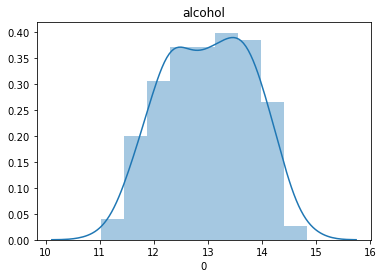

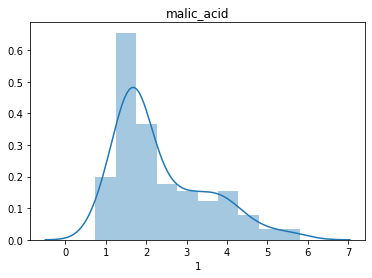

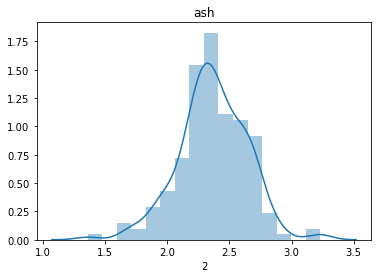

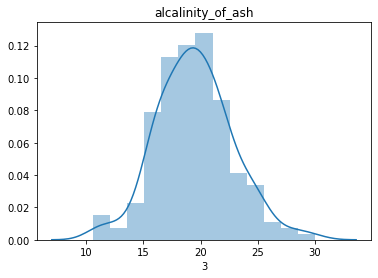

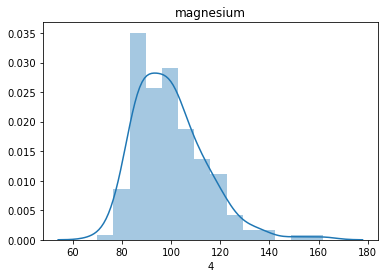

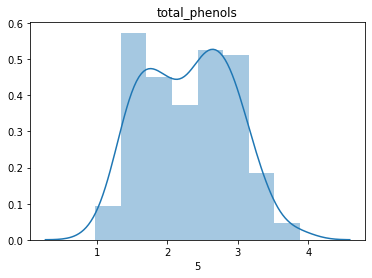

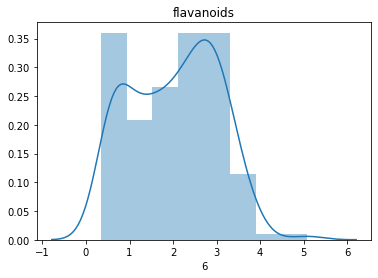

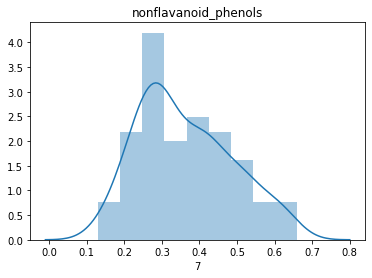

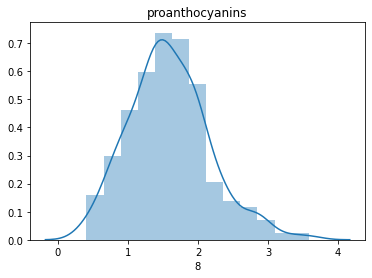

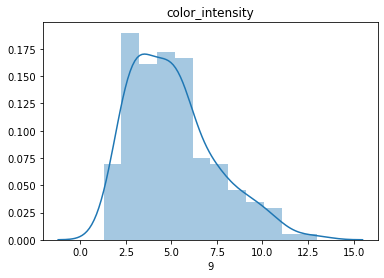

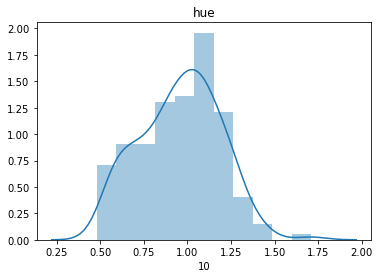

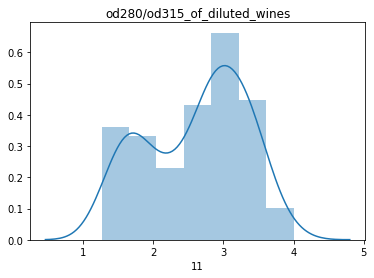

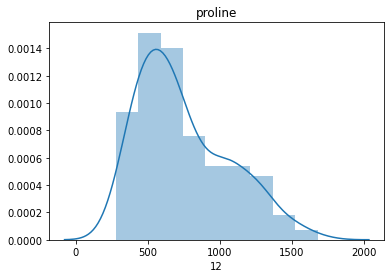

In [4]:
# 설명 변수들의 분포를 확인하며 정규성을 띄는지 확인
dfX = pd.DataFrame(X)
dfy = pd.DataFrame(y)

for i in range(dfX.shape[1]):
    sns.distplot(dfX[i])
    plt.title(feature_names[i])
    plt.show()

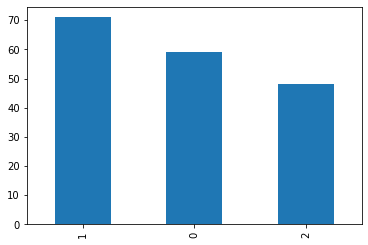

In [5]:
# 종속변수가 골고루 있는지 확인
pd.DataFrame(y)[0].value_counts().plot(kind='bar')

In [12]:
#데이터 가공 없이 모델 성능 확인
# Train / Test로 데이터 분류
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# 모델 생성 / 최대 iter 2000 / 다중 분류이므로 multi_class 적용
clf = LogisticRegression(max_iter=2000, random_state=0,
                        multi_class='multinomial', 
                        solver='sag')
clf.fit(x_train, y_train)

C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(max_iter=2000, multi_class='multinomial', random_state=0,
                   solver='sag')

In [13]:
pred = clf.predict(x_test)
print(accuracy_score(y_test, pred))

0.9722222222222222


In [26]:
# 모델 생성 및 적용
pca = PCA()
pca.fit(x_train)

# PC score 구하기
pcscore = pca.transform(x_train)
pca.explained_variance_

array([9.23122052e+04, 1.79716451e+02, 1.01655076e+01, 5.39325200e+00,
       1.10562509e+00, 8.18998492e-01, 2.94908199e-01, 1.43174889e-01,
       1.01394543e-01, 6.83830602e-02, 3.67738417e-02, 2.11702753e-02,
       7.82642132e-03])

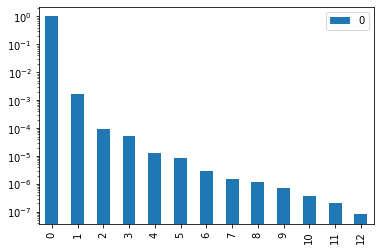

In [18]:
PC_ratio = pca.explained_variance_ratio_
PC_ratio_df = pd.DataFrame(PC_ratio)
PC_ratio_df.plot(kind='bar', logy=True)

In [28]:
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
cf1 = confusion_matrix(y_test, pred)
print(cf1)
print(accuracy_score(y_test, pred))

clf.fit(x_train, y_train)
pred2 = clf.predict(x_test)
cf2 = confusion_matrix(y_test, pred2)
print(cf2)
print(accuracy_score(y_test, pred2))

[[13  1  0]
 [ 0 16  0]
 [ 0  0  6]]
0.9722222222222222
[[13  1  0]
 [ 0 16  0]
 [ 0  0  6]]
0.9722222222222222


C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [40]:
# Train / Test로 데이터 분류
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

# train data만을 가지고 pca 생성
pca = PCA()
pca.fit(x_train)
train_score = pca.transform(x_train)
test_score = pca.transform(x_test)

In [41]:
pca.explained_variance_

array([9.54186635e+04, 1.94003067e+02, 1.02519610e+01, 5.40570170e+00,
       1.03841055e+00, 8.50080606e-01, 3.00830782e-01, 1.35259942e-01,
       1.00121256e-01, 6.04914648e-02, 4.01235682e-02, 2.32348167e-02,
       7.26416884e-03])

In [31]:
# pca 적용하지 않은 데이터와 적용한 데이터에 
# 동일하게 적용할 로지스틱회귀모델 생성
clf = LogisticRegression(max_iter=2000, random_state=0,
                        multi_class='multinomial', 
                        solver='sag')
clf2 = LogisticRegression(max_iter=2000, random_state=0,
                        multi_class='multinomial', 
                        solver='sag')

In [42]:
# 2개의 feature만을 사용해서 모델 생성 및 예측

# Raw Data
clf.fit(x_train[:,:2], y_train)
pred = clf.predict(x_test[:,:2])
cf1 = confusion_matrix(y_test, pred)
print(cf1)
print(accuracy_score(y_test, pred))

# PC score
clf2.fit(train_score[:,:2], y_train)
pred2 = clf2.predict(test_score[:,:2])
cf2 = confusion_matrix(y_test, pred2)
print(cf2)
print(accuracy_score(y_test, pred2))

[[14  2  3]
 [ 1 19  2]
 [ 4  2  7]]
0.7407407407407407
[[18  1  0]
 [ 1 21  0]
 [ 2  9  2]]
0.7592592592592593


C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [43]:
# 조합 case를 만들기 위한 library
from itertools import combinations

# 점수들을 모두 담기 위한 빈 리스트
score_board = []

# 순서가 없고 조합되지 않은 모든 케이스에 대해서 모델을 생성하고 결과를 확인
for comb in combinations(list(range(0,x_train.shape[1])),2):
    clf.fit(x_train[:,comb],y_train)
    pred = clf.predict(x_test[:,comb])
    score = accuracy_score(y_test, pred)
    score_board.append(score)
    print(comb)
    print(score)

C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


(0, 1)
0.7407407407407407
(0, 2)
0.7222222222222222
(0, 3)
0.7592592592592593
(0, 4)
0.4444444444444444
(0, 5)
0.8703703703703703
(0, 6)
0.8888888888888888
(0, 7)
0.7037037037037037
(0, 8)
0.7592592592592593
(0, 9)
0.7962962962962963
(0, 10)
0.8888888888888888
(0, 11)

C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



0.8518518518518519
(0, 12)
0.7037037037037037
(1, 2)
0.6666666666666666
(1, 3)
0.6111111111111112
(1, 4)
0.5185185185185185
(1, 5)
0.7407407407407407
(1, 6)
0.7962962962962963
(1, 7)
0.4444444444444444
(1, 8)
0.5925925925925926
(1, 9)
0.8333333333333334
(1, 10)
0.5925925925925926
(1, 11)
0.6481481481481481
(1, 12)

C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "



0.4444444444444444
(2, 3)
0.7037037037037037
(2, 4)
0.4444444444444444
(2, 5)
0.7777777777777778
(2, 6)
0.8518518518518519
(2, 7)
0.6111111111111112
(2, 8)
0.6851851851851852
(2, 9)
0.7407407407407407
(2, 10)
0.7407407407407407
(2, 11)
0.7592592592592593
(2, 12)
0.5
(3, 4)
0.6481481481481481
(3, 5)
0.6666666666666666
(3, 6)
0.7962962962962963
(3, 7)
0.5
(3, 8)
0.6666666666666666
(3, 9)
0.7962962962962963
(3, 10)
0.6851851851851852
(3, 11)
0.7222222222222222
(3, 12)
0.7037037037037037
(4, 5)
0.5370370370370371
(4, 6)
0.7407407407407407
(4, 7)

C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef


0.5740740740740741
(4, 8)
0.6111111111111112
(4, 9)
0.7407407407407407
(4, 10)
0.7407407407407407
(4, 11)
0.6666666666666666
(4, 12)
0.7407407407407407
(5, 6)
0.7962962962962963
(5, 7)
0.6481481481481481
(5, 8)
0.6296296296296297
(5, 9)
0.8518518518518519
(5, 10)
0.7222222222222222
(5, 11)
0.7407407407407407


C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


(5, 12)
0.5
(6, 7)
0.7962962962962963
(6, 8)
0.8148148148148148
(6, 9)
0.8703703703703703
(6, 10)
0.8518518518518519
(6, 11)
0.8148148148148148
(6, 12)
0.42592592592592593
(7, 8)
0.5555555555555556
(7, 9)
0.8148148148148148
(7, 10)
0.5740740740740741
(7, 11)
0.6296296296296297
(7, 12)
0.35185185185185186
(8, 9)
0.8518518518518519
(8, 10)
0.6296296296296297
(8, 11)
0.6481481481481481
(8, 12)
0.3888888888888889
(9, 10)
0.8703703703703703
(9, 11)
0.8703703703703703
(9, 12)
0.5555555555555556
(10, 11)
0.6481481481481481
(10, 12)
0.37037037037037035
(11, 12)
0.5370370370370371


C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\HYS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef

In [44]:
# 최대 점수 확인
max(score_board)

0.8888888888888888